# Візуалізація даних (Data visualization)

Важливо підкреслити різницю між двома дуже різними поняттями, які люди описують, використовуючи загальний термін «візуалізація». Перше з них — «візуалізація для дослідження даних»: використання візуалізації для розуміння (тобто для власного розуміння) сукупності даних з метою подальшого аналізу. Коротко кажучи, мета цього типу візуалізації — «знайти істину» в даних. Альтернативою є «візуалізація для презентації»: виокремлення певного аспекту даних у вигляді зрозумілої діаграми або графіку, що передає широкій аудиторії конкретний аспект даних, який ви хочете донести. Цей тип візуалізації має на меті «переконати інших людей у правдивості ваших висновків».

## Візуалізація VS статистика

Візуалізація майже завжди надає більш інформативний (хоча і менш кількісний) огляд ваших даних, ніж статистика (підхід, а не галузь науки в цілому).


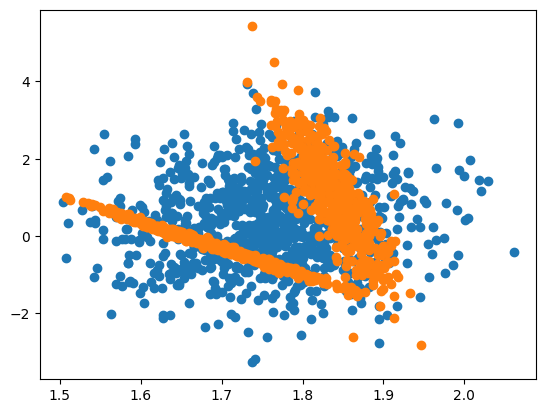

In [1]:
# this code creates two randoms distributions and scales them to have the same mean and covariance

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

np.random.seed(0)
x = np.random.randn(2) + np.random.randn(1000,2) @ np.random.randn(2,2)
y = np.concatenate([np.random.randn(500,2) @ np.random.randn(2,2), 
                    [4,4]+np.random.randn(500,2) @ np.random.randn(2,2)])

A = la.sqrtm(np.cov(x.T))
B = la.sqrtm(np.cov(y.T))
y = ((y - np.mean(y,0)) @ np.linalg.inv(B) @ A) + np.mean(x,0)
plt.scatter(*x.T)
plt.scatter(*y.T)

## Типи даних (Types of data)

Чотири основні типи даних:

- *Номінальні дані (Nominal data)*: категоріальні дані без внутрішнього порядку між категоріями. Наприклад, змінна «тип домашньої тварини» може складатися з класів {собака, кіт, кролик}, і між цими двома типами немає відносного порядку, це просто різні дискретні значення.

- *Порядкові дані (Ordinal data)*: категоріальні дані з внутрішньою послідовністю, але «відмінності» між категоріями не мають суто числового значення. Канонічним прикладом тут є відповіді на опитування з такими відповідями: {категорично не згоден, трохи не згоден, нейтральний, трохи згоден, категорично згоден}. Важливою особливістю тут є те, що, хоча між цими типами існує чітка послідовність, немає сенсу вважати, що різниця між «трохи згоден» і «категорично згоден» є «такою ж», як різниця між «нейтральний» і «трохи згоден».

- *Інтервальні дані (Interval data)*: числові дані, тобто дані, які можна відобразити на «числовій прямій»; важливим аспектом на відміну від порядкових даних є не «дискретна проти безперервної диференціації» (наприклад, цілочисельні значення можна вважати інтервальними даними), а той факт, що відносні відмінності в інтервальних даних мають значення. Класичним прикладом є температура (у Фаренгейті або Цельсії, що ми підкреслимо трохи пізніше): тут різниці між температурами мають значення: 10 і 15 градусів розділені такою ж величиною, як 15 і 20 (ця властивість настільки властива числовим даним, що майже дивно її підкреслювати). З іншого боку, інтервальні дані охоплюють випадки, коли нульова точка «не має реального значення»; на практиці це означає, що співвідношення між двома точками даних не має значення. Двадцять градусів за Фаренгейтом не є «вдвічі гарячішими» в будь-якому значущому сенсі, ніж 10 градусів; і, звичайно, не нескінченно гарячішими, ніж нуль градусів.

- *Дані про співвідношення (Ratio data)*: також числові дані, але співвідношення між вимірами має певне значення. Класичним прикладом тут є температура за Кельвіном. Очевидно, що, як і температура за Фаренгейтом або Цельсієм, це описує основне явище температури, але на відміну від попередніх випадків, нуль за Кельвіном має значення з точки зору молекулярної енергії в речовині (тобто її відсутність). Це означає, що співвідношення мають реальне значення: речовина при 20 градусах Кельвіна має вдвічі більше кінетичної енергії на молекулярному рівні, ніж та сама речовина при 10 градусах Кельвіна.

«Допустимі операції», які ми можемо виконувати над двома даними різних типів:

Номінальні дані: =,≠. Все, що ми можемо зробити з номінальними даними, це порівняти два дані та перевірити, чи вони рівні.

Порядкові дані: =,≠,<,>. Окрім перевірки на рівність, ми також можемо порівнювати порядок різних точок даних.

Інтервальні дані: =,≠,<,>,−. Ми маємо всі операції з порядковими даними, але також можемо обчислювати точні числові різниці між двома точками даних. Залежно від контексту, ми можемо сказати, що додавання також дозволено, але іноді додавання фактично передбачає нульову точку і тому застосовується тільки до даних про співвідношення.

Дані співвідношення: =,≠,<,0,−,+,÷. Ми маємо всі операції з інтервальними даними, але додавання тепер практично завжди дозволено, і ми можемо додатково виконувати ділення (для визначення співвідношень) між різними точками даних.

**Коротко**:

Номінальні: категоріальні дані, без упорядкування Приклад – Домашні тварини: {собака, кіт, кролик, …} Операції: =, ≠

Порядкові: категоріальні дані, з упорядкуванням Приклад – Рейтинг: {«поганий»,«нейтральний»,“хороший”,«дуже хороший»} Операції: =, ≠, ≥, ≤, >, <

Інтервал: числові дані, нуль не означає нульову «кількість» Приклад – температура за Фаренгейтом, Цельсієм Операції: = , ≠, ≥, ≤, >, <, +, −

Співвідношення: числові дані, нуль має значення, пов'язане з нульовою «кількістю» Приклад – температура за Кельвіном Операції: = , ≠, ≥, ≤, >, <, +, −,÷

## Побудова графіків різних типів даних

Щоб бути більш формальними, далі ми припускаємо, що маємо доступ до набору даних, який можна позначити як

$\{x^{(1)},x^{(2)},…,x^{(m)}\}$

де кожне $x^{(i)}$ є деякою точкою даних. $x^{(i)}=(a_{1}^{i}, a_{2}^{i}, a_{3}^{i}, ...)$

Для побудови всіх цих графіків ми будемо використовувати бібліотеку matplotlib, яка добре інтегрується з Jupyter notebook.

## 1D дані

### Стовпчасті діаграми (Bar charts) — категоріальні дані

Якщо ваші дані є одновимірними категоріальними, єдиним реальним варіантом для їх візуалізації є використання стовпчастої діаграми. Зверніть увагу, що, виходячи з нашого припущення про те, що порядок точок даних у нашому наборі даних не має значення, єдиною значущою інформацією, якщо ми маємо набір даних типу

$\{student,teacher,student,professor,teacher,student,…\}$

буде кількість повторень кожного елемента. Таким чином, ми можемо ефективно узагальнити дані, включивши кількість повторень кожного значення даних (це легко зробити за допомогою класу `collections.Counter`).

Примітка: незважаючи на те, що ви, можливо, бачили на деяких рисунках, зверніть увагу, що включення ліній між різними стовпчиками однозначно не має сенсу.

<BarContainer object of 3 artists>

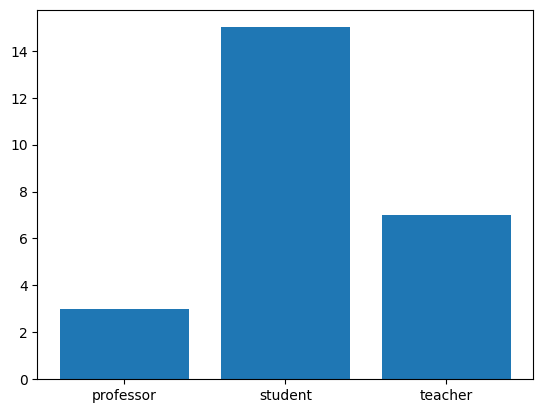

In [3]:
import collections
import matplotlib.pyplot as plt
import numpy as np

data = np.random.permutation(np.array(["student"]*15 + ["teacher"]*7 + ["professor"]*3))
# print(data)
counts = collections.Counter(data)
plt.bar(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))

# DON'T DO THIS
# plt.bar(range(len(counts)), counts.values(), tick_label=list(counts.keys()))
# plt.plot(range(len(counts)), counts.values(), 'ko-')

### Кругові діаграми (Pie charts) — просто «ні»

Кругові діаграми призначені для представлення даних, а не для їх дослідження!

Люди не дуже добре оцінюють площу або кути (наприклад, важко визначити, чи один сегмент становить 23 %, а інший — 27 %). Стовпчасті діаграми набагато простіші, оскільки люди точніше порівнюють довжини.

Порівняти дві різні кругові діаграми (наприклад, два періоди часу) майже неможливо. Неможливо легко додати смуги похибки, опорні лінії або точні порівняння.

Ось приклад того, як побудувати кругову діаграму:

(-1.0999986510401087,
 1.0999999357638148,
 -1.099999574113153,
 1.099991056376208)

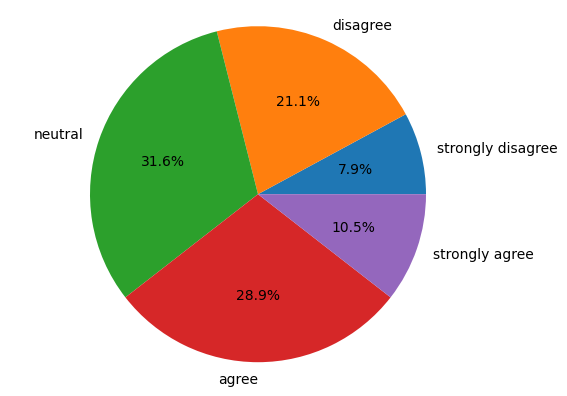

In [4]:
data = {"strongly disagree": 3,
        "disagree": 8,
        "neutral": 12,
        "agree": 11,
        "strongly agree": 4}

plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%')
plt.axis('equal')

### Гістограми (Histograms) — числові дані

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.400e+01, 2.300e+01, 3.300e+01,
        6.700e+01, 1.090e+02, 1.730e+02, 2.260e+02, 3.140e+02, 3.750e+02,
        3.540e+02, 3.360e+02, 2.710e+02, 2.510e+02, 1.900e+02, 1.500e+02,
        1.550e+02, 2.430e+02, 4.840e+02, 7.500e+02, 1.086e+03, 1.316e+03,
        1.237e+03, 1.064e+03, 7.600e+02, 5.180e+02, 4.360e+02, 3.890e+02,
        3.990e+02, 4.290e+02, 4.640e+02, 4.440e+02, 4.020e+02, 3.690e+02,
        3.050e+02, 2.690e+02, 1.720e+02, 1.510e+02, 1.080e+02, 7.500e+01,
        3.300e+01, 2.400e+01, 1.900e+01, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.91714412,  1.80293406,  2.68872399,  3.57451393,  4.46030386,
         5.3460938 ,  6.23188373,  7.11767367,  8.0034636 ,  8.88925354,
         9.77504347, 10.66083341, 11.54662334, 12.43241327, 13.31820321,
        14.20399314, 15.08978308, 15.97557301, 16.86136295, 17.74715288,
        18.63294282, 19.51873275, 20.40452269, 21.29031262, 22.17610256,
        23.

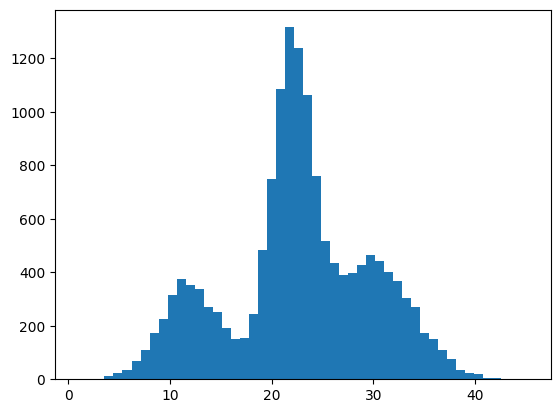

In [8]:
np.random.seed(0)
data = np.concatenate([30 + 4*np.random.randn(5000),
                       22 + 2*np.random.randn(7000),
                       12 + 3*np.random.randn(3000)])
plt.hist(data, bins=50)


# data = np.concatenate([10 + 5*np.random.randn(10000)])
# plt.hist(data, bins=50);

## 2D дані

### Точкові діаграми — числові x числові (Scatter plots — numeric x numeric)

Якщо обидва виміри даних є числовими, найприроднішим першим типом діаграми, який слід розглянути, є точкова діаграма: нанесення точок, які просто відповідають різним координатам даних. (Діаграма розсіювання)

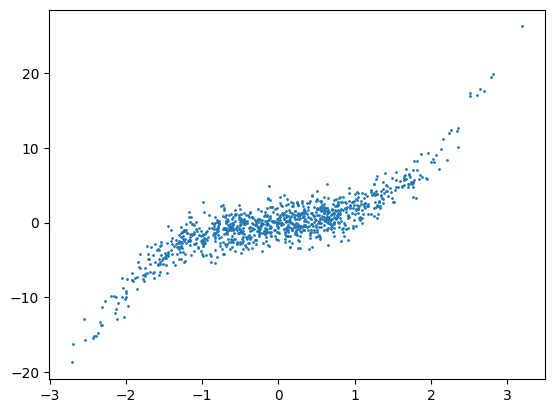

In [10]:
x = np.random.randn(1000)
y = 0.8*x**3 + x + 1.5*np.random.randn(1000)
plt.scatter(x,y,s=1)

Однак існує також природний режим відмови, коли точок занадто багато, щоб їх можна було чітко розділити, і графік втрачає здатність показувати щільність даних. Наприклад, якщо у нас в 10 разів більше точок, графік вже не так чітко показує щільність у внутрішній частині «щільності».

У цьому випадку надлишку даних ми також можемо створити 2D гістограму даних (яка групує дані за обома вимірами) і вказати «висоту» кожного блоку за допомогою кольорової карти. Такі графіки можуть чіткіше вказувати щільність точок у регіонах, які в оригінальному графіку розсіювання мають суцільний колір. Ці 2D гістограми іноді також називають *тепловими картами* (heat maps), але ця назва часто конфліктує з подібними версіями, що використовуються для побудови 2D категоріальних даних, тому тут ми будемо використовувати термін *2D гістограма*.

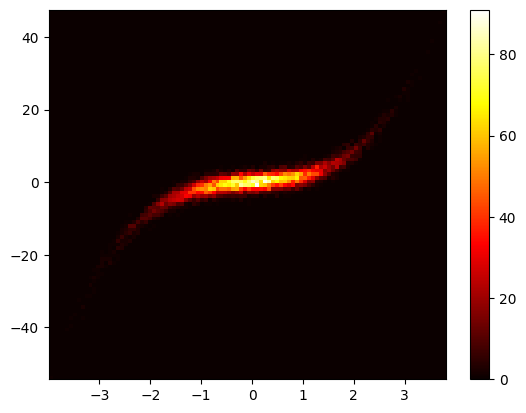

In [12]:
x = np.random.randn(10000)
y = 0.8*x**3 + x + 1.5*np.random.randn(10000)
#plt.scatter(x,y,s=10)

plt.hist2d(x,y,bins=100);
plt.colorbar();
plt.set_cmap('hot')

### Лінійна діаграма (line plot) - numeric x numeric (sequential) 

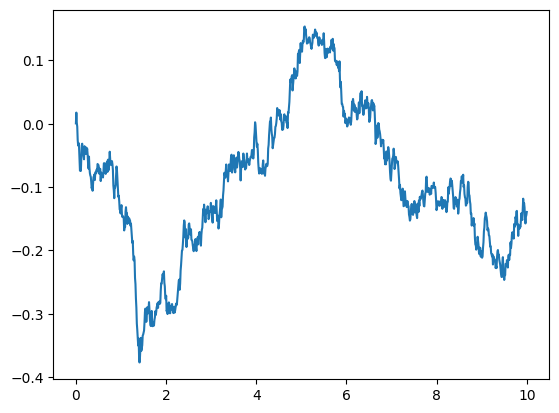

In [13]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y)

### Коробкова (Box and whiskers) і скрипкові діаграми (Violin plots) — категоріальні x числові

Розглянемо простий приклад, де (тільки з вигаданими даними) ми будуємо графік учасників навчального процесу та їхній вік.

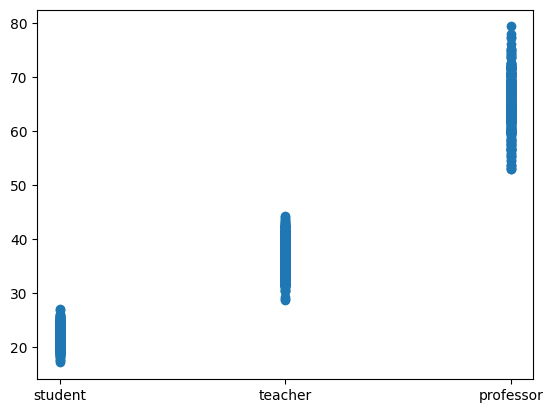

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

data= {"student": 22 + 1.4*np.random.randn(1000),
       "teacher": 37 + 2.5*np.random.randn(900),
       "professor": 65 + 5.5*np.random.randn(300)}
plt.scatter(np.concatenate([i*np.ones(len(x)) for i,x in enumerate(data.values())]),
            np.concatenate(list(data.values())))
plt.xticks(range(len(data)), data.keys());

Очевидно, що, дивлячись тільки на цей графік, можна визначити дуже мало, оскільки в щільній лінії точок недостатньо інформації, щоб дійсно зрозуміти розподіл числової змінної для кожної точки. Поширеною стратегією тут є використання графіка коробкова, або *коробка з вусами* (box and whiskers), яка відображає медіану даних (як лінію в середині коробки), 25-й і 75-й процентилі даних (як нижня і верхня межі коробки), «вуса» встановлюються за допомогою ряду різних можливих угод (за замовчуванням Matplotlib використовує 1,5-кратний інтерквартильний розмах, відстань між 25-м і 75-м процентилем), а будь-які точки поза цим діапазоном («випадкові значення») відображаються окремо.

([<matplotlib.axis.XTick at 0x2bf8fb4d150>,
 [Text(1, 0, 'student'), Text(2, 0, 'teacher'), Text(3, 0, 'professor')])

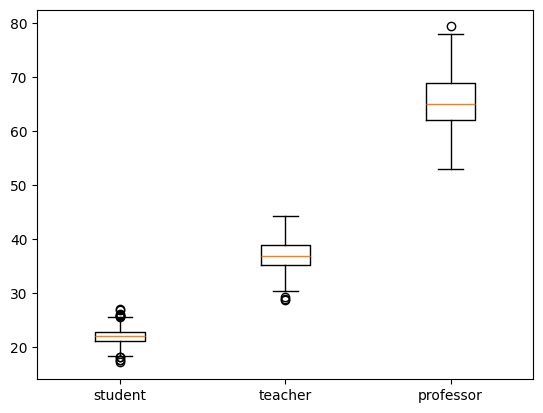

In [20]:
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys())

Звичайно, так само як середні значення та стандартні відхилення не описують повністю набір даних, статистика бокс-плат і вусів не відображає повністю розподіл даних. З цієї причини також часто використовуються скрипкові діаграми, які створюють міні-гістограми.

([<matplotlib.axis.XTick at 0x2bfbb5d5150>,
 [Text(1, 0, 'student'), Text(2, 0, 'teacher'), Text(3, 0, 'professor')])

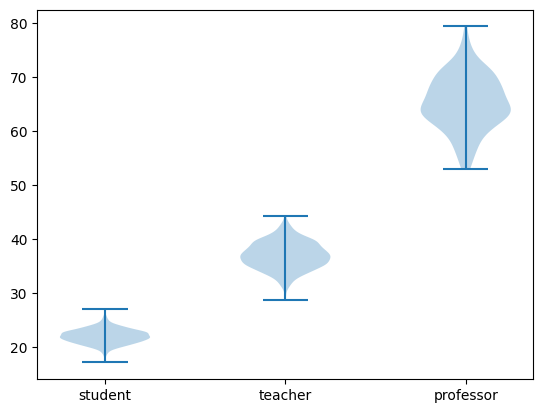

In [21]:
plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys())

### Теплова карта (Heatmap) та бульбашкові діаграми (Bubble plots) — категоріальні x категоріальні

Коли обидва виміри наших 2D-даних є категоріальними, ми маємо ще менше інформації для використання. Знову ж таки, метою буде надання певної інформації про загальну кількість усіх можливих комбінацій між двома наборами даних. Наприклад, розглянемо вигаданий набір даних про учасників навчального процесу та їхній улюблений спосіб навчання

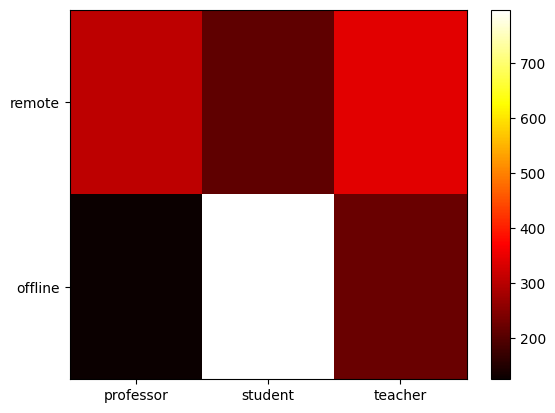

In [22]:
types = np.array([('student', 'offline'), ('student', 'remote'), 
                  ('teacher', 'offline'), ('teacher', 'remote'), 
                  ('professor', 'offline'), ('professor', 'remote')])
data = types[np.random.choice(range(6), 2000, p=[0.4, 0.1, 0.12, 0.18, 0.05, 0.15]),:]

# print(data[100:])

label_x, x = np.unique(data[:,0], return_inverse=True)
label_y, y = np.unique(data[:,1], return_inverse=True)
M, xt, yt, _ = plt.hist2d(x,y, bins=(len(label_x), len(label_y)))
plt.xticks((xt[:-1]+xt[1:])/2, label_x)
plt.yticks((yt[:-1]+yt[1:])/2, label_y)
plt.colorbar()

Хоча це може бути дещо корисним, діапазон кольорів, безперечно, не є дуже інформативним у деяких налаштуваннях, тому більш доречним може бути діаграма розсіювання з розмірами, пов'язаними з кожним типом даних (це також називається бульбашковою діаграмою).

([<matplotlib.axis.YTick at 0x2bfbb66e890>,
 [Text(0, 0, 'offline'), Text(0, 1, 'remote')])

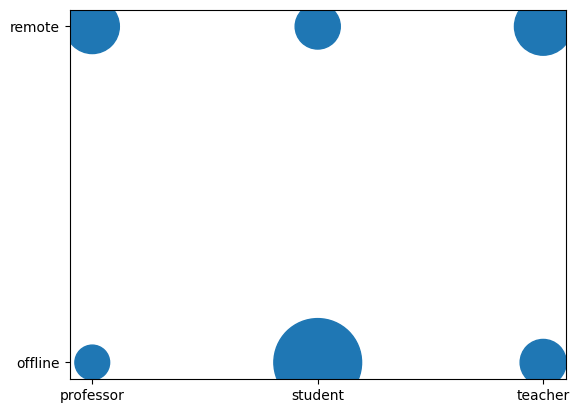

In [23]:
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.scatter(xy[0], xy[1], s=cnts*5)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)

## 3D+ data

Як тільки ми виходимо за межі двох вимірів, ефективна візуалізація стає набагато складнішою.

### 3D точкові графіки (3D scatter plots)

Слід уникати, якщо не можна взаємодіяти з 3D-графіком:

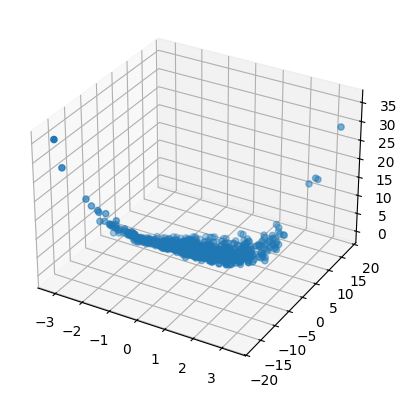

In [26]:
x = np.random.randn(1000)
y = 0.4*x**3 + x + 1.7*np.random.randn(1000)
z = 0.5 + 0.1*(y-1)**2 + 0.4*np.random.randn(1000)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

### Матриці розсіювання (точкові матриці) (scatter matrices)

Універсальним засобом для візуалізації високорозмірних даних є матриця розсіювання. 

Щодо матриць розсіювання слід зазначити один важливий момент: не намагайтеся використовувати їх для представлення даних.

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>]], dtype=object)

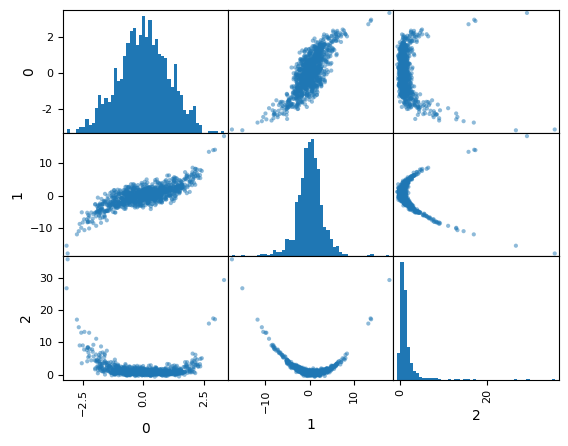

In [27]:
import pandas as pd
df = pd.DataFrame([x,y,z]).transpose()
pd.plotting.scatter_matrix(df, hist_kwds={'bins':50})

### Бульбашкові діаграми (Bubble plots)

Бульбашкова діаграма з попереднього розділу також може бути одним із засобів розуміння тривимірних даних. У цій діаграмі та її варіантах ми побудуємо двовимірну точкову діаграму, але додамо третій вимір за допомогою іншого атрибуту, наприклад розміру точок. Для наведених вище даних це буде виглядати наступним чином.

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


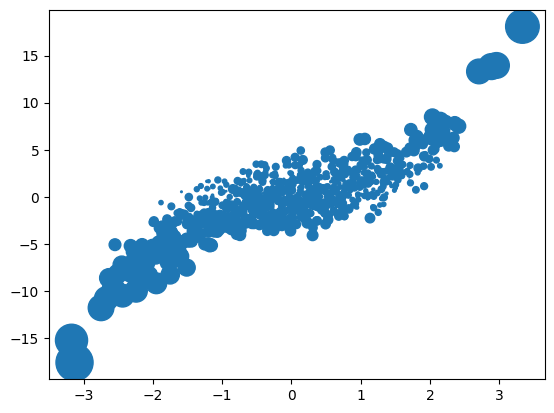

In [28]:
plt.scatter(x,y,s=z*20)

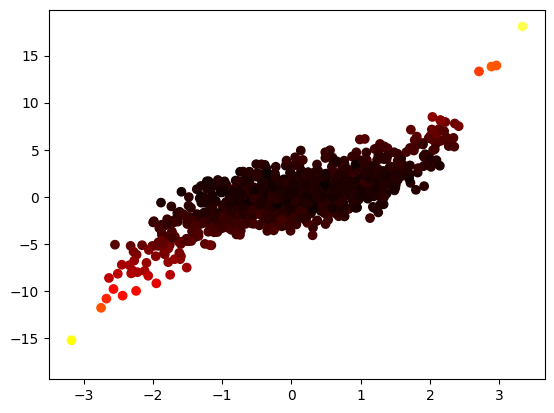

In [29]:
plt.scatter(x,y,c=z)

### Кольорові діаграми розсіювання (Colored scatter plots)

Одне з налаштувань, де використання кольору для позначення третього виміру працює добре, — це коли третій вимір є категоріальною змінною. Припускаючи, що категорій не надто багато, ми можемо використовувати різко контрастні кольори для позначення третього виміру. Це часто зустрічається, наприклад, у рисунках, що описують алгоритми класифікації машинного навчання, оскільки корисно візуалізувати простір вхідних даних алгоритму як двовимірний, а мітку класу — як дискретну величину. Фактично, ми вже бачили один із таких випадків, коли хотіли візуалізувати два різних розподіли з однаковими статистичними показниками першого та другого порядку.

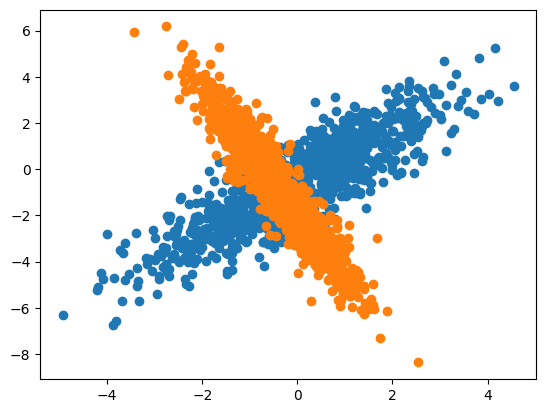

In [30]:
np.random.seed(0)
xy1 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
xy2 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
plt.scatter(xy1[:,0], xy1[:,1])
plt.scatter(xy2[:,0], xy2[:,1])